# ASSIGNMENT 7

# Linear Regression using Gradient Descent

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#generating dataset
def predictions(x,add_noise=False,mean =0,var = 0.25):
    if not add_noise:
        return x
    return x+np.random.normal(mean,var,x.shape)
x = np.linspace(-1,5,50)*1000

In [3]:
#normalizing x
x_transform = []
for i in range(len(x)):
    x_transform.append((x[i]-min(x))/(max(x)-min(x)))
x_transform = np.array(x_transform)
y = predictions(x_transform,True)

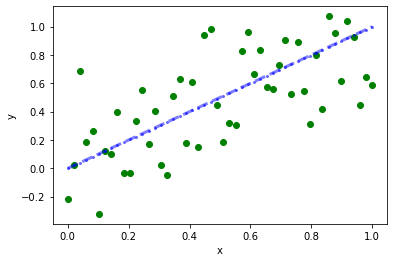

In [4]:
plt.scatter(x_transform,y,color = "green")
plt.plot(x_transform,x_transform,'bo--',linewidth = 3,markersize = 2,alpha = 0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [5]:
# Mean square error
def mse(yt,yp):
    return (np.sum((yt-yp)**2)/len(yt))

def updates(yt,yp,x,lr,m,c):
    m = m- lr*((-x)*(np.sum(yt-yp)/len(yt))*2)
    c = c- lr*((-1)*(np.sum(yt-yp)/len(yt))*2)

    return m,c

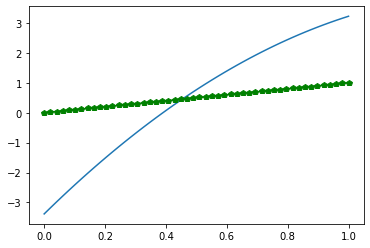

In [6]:
m,c = 10,0
lr = 0.1
total_loss = []
for i in range(100):
    yp = m*x_transform + c    
    loss = mse(y,yp)
    total_loss.append(loss)
    m,c = updates(y,yp,x_transform,lr,m,c)
plt.plot(x_transform,yp,label=i+1)

plt.plot(x_transform,x_transform,color='green',marker='p')
plt.show()

(3.072758146830878, 27.939937256071506)

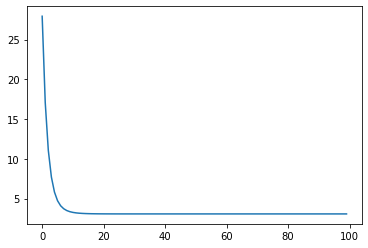

In [7]:
plt.plot(total_loss)
total_loss[-1], total_loss[0]

# Linear Regression using Gradient Descent for housing data

In [27]:
#applying linear regression on boston housing dataset
from sklearn.datasets import load_boston
boston_dataset = load_boston()
X = boston_dataset.data
Y = boston_dataset.target
X,Y

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 31.6, 23.3, 19.6, 1

In [9]:
X.shape

(506, 13)

In [10]:
#Normalizing the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_transform = sc.fit_transform(X)

In [11]:
#splitting test and train data
test_train_ratio = 0.2
num_testing_example = int(test_train_ratio*(X.shape[0]))
num_training_example = X.shape[0]-num_testing_example
X_train = X_transform[:num_training_example]
Y_train = Y[:num_training_example]
X_test = X_transform[num_training_example:]
Y_test = Y[num_training_example:]
X_test,Y_test

(array([[ 7.48364564, -0.48772236,  1.01599907, ...,  0.80657583,
          0.31024714,  1.4475658 ],
        [ 1.99029374, -0.48772236,  1.01599907, ...,  0.80657583,
          0.14852285,  1.49802836],
        [ 0.97027072, -0.48772236,  1.01599907, ...,  0.80657583,
         -0.26954813, -0.07331975],
        ...,
        [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
          0.44105193, -0.98304761],
        [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
          0.4032249 , -0.86530163],
        [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
          0.44105193, -0.66905833]]),
 array([ 5. , 11.9, 27.9, 17.2, 27.5, 15. , 17.2, 17.9, 16.3,  7. ,  7.2,
         7.5, 10.4,  8.8,  8.4, 16.7, 14.2, 20.8, 13.4, 11.7,  8.3, 10.2,
        10.9, 11. ,  9.5, 14.5, 14.1, 16.1, 14.3, 11.7, 13.4,  9.6,  8.7,
         8.4, 12.8, 10.5, 17.1, 18.4, 15.4, 10.8, 11.8, 14.9, 12.6, 14.1,
        13. , 13.4, 15.2, 16.1, 17.8, 14.9, 14.1, 12.7, 13.5, 14.9, 20. ,
   

In [12]:
#initializing the variables
weight_vector = np.random.randn(X.shape[1])
intercept = 0
learning_rate = 0.001

In [13]:
#creating the MSE loss function
def loss(y,y_predicted):
    s = 0
    n = len(y)
    for i in range(n):
        s+=(y[i]-y_predicted[i])**2
    return (1/n)*s

In [14]:
#create function to predict y
def predicted_y(weight,x,intercept):
    y_list = []
    for i in range(len(x)):  
        y_list.append((weight@x[i])+intercept)
    return np.array(y_list)

In [15]:
#create function to differentiate weight
def dldw(x,y,y_predicted):
    n = len(y)
    s = 0
    for i in range(n):
        s+= (-x[i]*(y[i]-y_predicted[i]))
    return (2/n)*s

In [16]:
#create function to differentiate intercept
def dldb(y,y_predicted):
    n = len(y)
    s = 0
    for i in range(n):
        s+= (-(y[i]-y_predicted[i]))
    return (2/n)*s

In [17]:
# gradient function
def gradient_descent(x,y):
    weight_vector=np.random.randn(x.shape[1])
    intercept=0
    epoch = 10000
    n = len(x)
    linear_loss=[]
    learning_rate = 0.001
    for i in range(epoch):
        y_predicted = predicted_y(weight_vector,x,intercept)
        weight_vector = weight_vector - learning_rate *dldw(x,y,y_predicted) 
        intercept = intercept - learning_rate * dldb(y,y_predicted)
        linear_loss.append(loss(y,y_predicted))
        
    plt.plot(np.arange(epoch),linear_loss[:])
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
    return weight_vector,intercept

In [18]:
weight_vector

array([-0.37316438,  0.15858296, -0.07100309, -0.13615487,  0.17524465,
        0.47273977,  1.13004013,  0.4279629 ,  0.57078678, -1.09588025,
       -1.11350333, -0.17160029,  1.82242288])

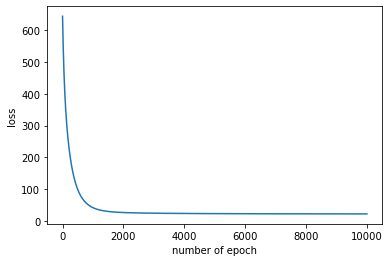

In [19]:
w,b=gradient_descent(X_train,Y_train)

In [20]:
def predict(inp):
    y_list = []
    for i in range(len(inp)):
        y_list.append(w@inp[i]+b)
    return y_list

In [21]:
y_pred = predict(X_test)
y_pred

[5.417246583375647,
 6.410355023579992,
 20.654576105118075,
 14.16833290262593,
 21.895989052408762,
 15.146930885068853,
 19.58400936958085,
 1.9449314865620195,
 11.254964466377096,
 -5.518099856674084,
 12.204812091999024,
 16.82799976951012,
 7.461520787756303,
 5.244974104457473,
 18.185542953120795,
 21.564853525069584,
 19.928890538697132,
 19.27134857476513,
 16.016997037399722,
 16.786750120070085,
 12.363502004074684,
 18.462781265802246,
 15.623457767451567,
 17.06785689004204,
 16.065402159192296,
 20.6539624899173,
 21.540693088094777,
 24.265989220248315,
 20.527899984695942,
 18.747727782190456,
 16.6597285602193,
 17.964763145233963,
 11.857544897172724,
 7.324482334104271,
 13.961520895480328,
 13.088358044916822,
 19.076190469344674,
 20.57107920239355,
 19.890826138750935,
 13.242693229302034,
 15.449512321685097,
 19.991777945776946,
 19.815374300475373,
 18.960353532466552,
 19.444844785673617,
 20.752277732310084,
 21.773337055035007,
 20.47782324360197,
 25.3138

In [22]:
df_predict = pd.DataFrame({"Y_Actual":Y_test,"Y_predicted":np.round(y_pred,1)})
df_predict

,Y_Actual,Y_predicted
0,5.0,5.4
1,11.9,6.4
2,27.9,20.7
3,17.2,14.2
4,27.5,21.9
...,...,...
96,22.4,24.3
97,20.6,22.6
98,23.9,28.7
99,22.0,27.1


In [1]:
x_transform = []
for i in range(x.shape[1]):
    x_transform.append((x[:,i]-min(x[:,i]))/(max(x[:,i])-min(x[:,i])))
x_transform = np.array(x_transform)
y = predictions(x_transform,True)

NameError: name 'x' is not defined

In [23]:
loss(Y_test,y_pred)

24.35425488852921

In [24]:
def accuracy(actual,predicted):
    corr_matrix = np.corrcoef(actual,predicted)
    corr = corr_matrix[0,1]
    R2 = corr**2
    return R2
accuracy(Y_test,y_pred)

0.45046800249310065

In [25]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.08402419593901456